# Descriptive Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

master = pd.read_csv('final_data_set.csv', sep = ';', encoding = 'utf-8')
uni_df = master.drop_duplicates('affiliation')[['affiliation', 'uni_nationality', 'continent']]
lau_df = master.drop_duplicates('laureate_name')[['laureate_name', 'nationality', 'birthyear', 'gender_mf']]

# På tværs af tid

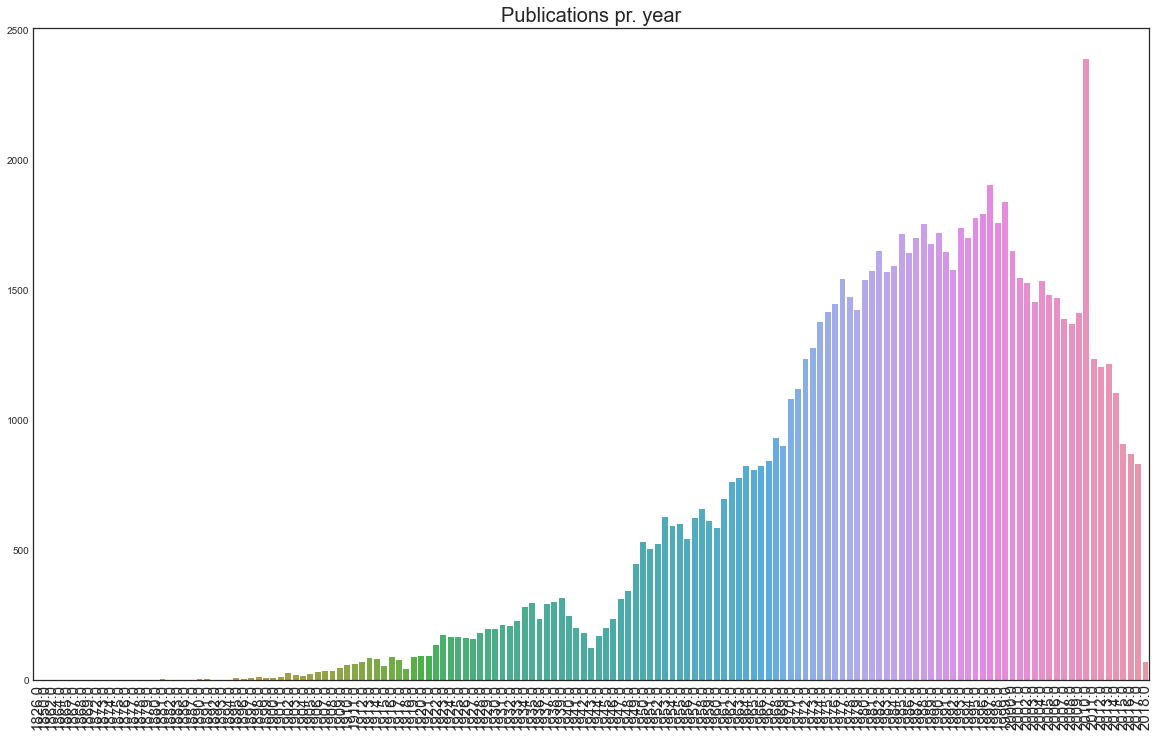

In [3]:
plt.style.use('seaborn-white')
_vals = master['pub_year'].value_counts()
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=90, size = 15)
plt.title('Publications pr. year', size = 20)
sns.barplot(x=_vals.index, y=_vals.values, ax=ax)

In [4]:
master.query('gender_mf == "F"').drop_duplicates(['laureate_name', 'affiliation']).sort_values('affiliation').\
drop_duplicates('laureate_name').affiliation.isna().sum()

5

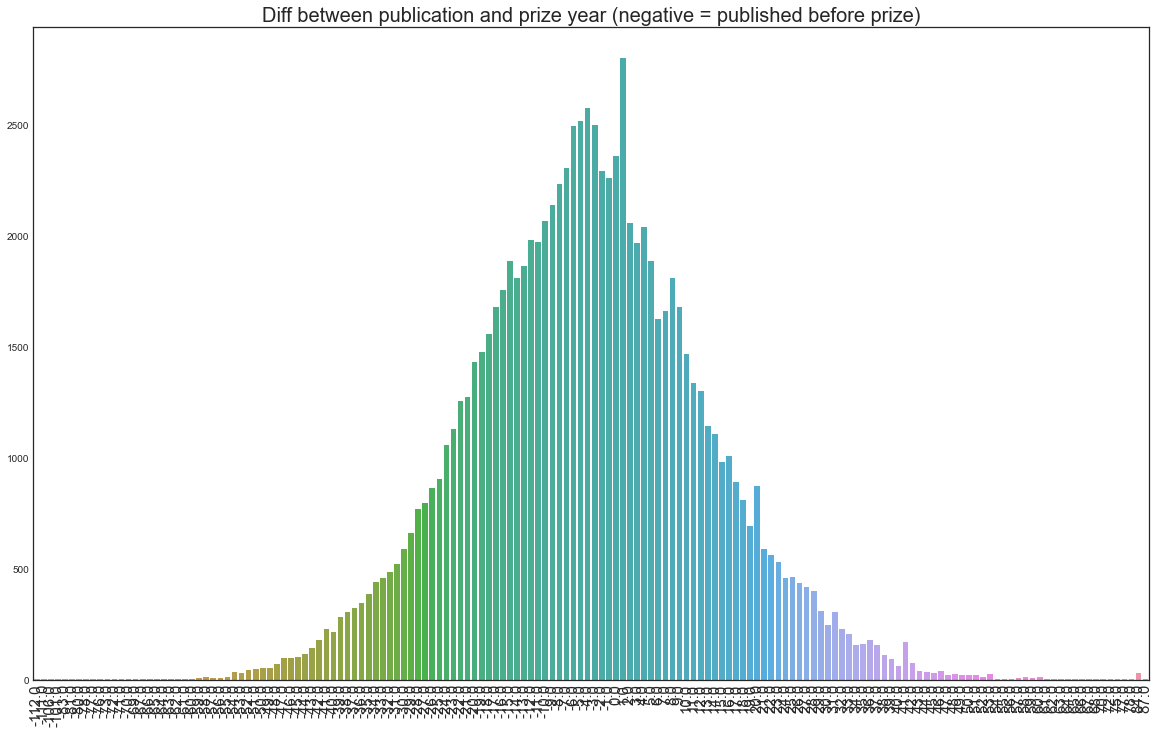

In [5]:
# diff between publication year and prize year 
master['pub_prize_diff'] = master.apply(lambda x: x['pub_year']- x['prize_year'], axis =1)

_vals = master['pub_prize_diff'].value_counts()
fig, ax = plt.subplots(figsize=(20, 12))
plt.xticks(rotation=90, size = 15)
plt.title('Diff between publication and prize year (negative = published before prize)', size = 20)
sns.barplot(x=_vals.index, y=_vals.values, ax=ax)

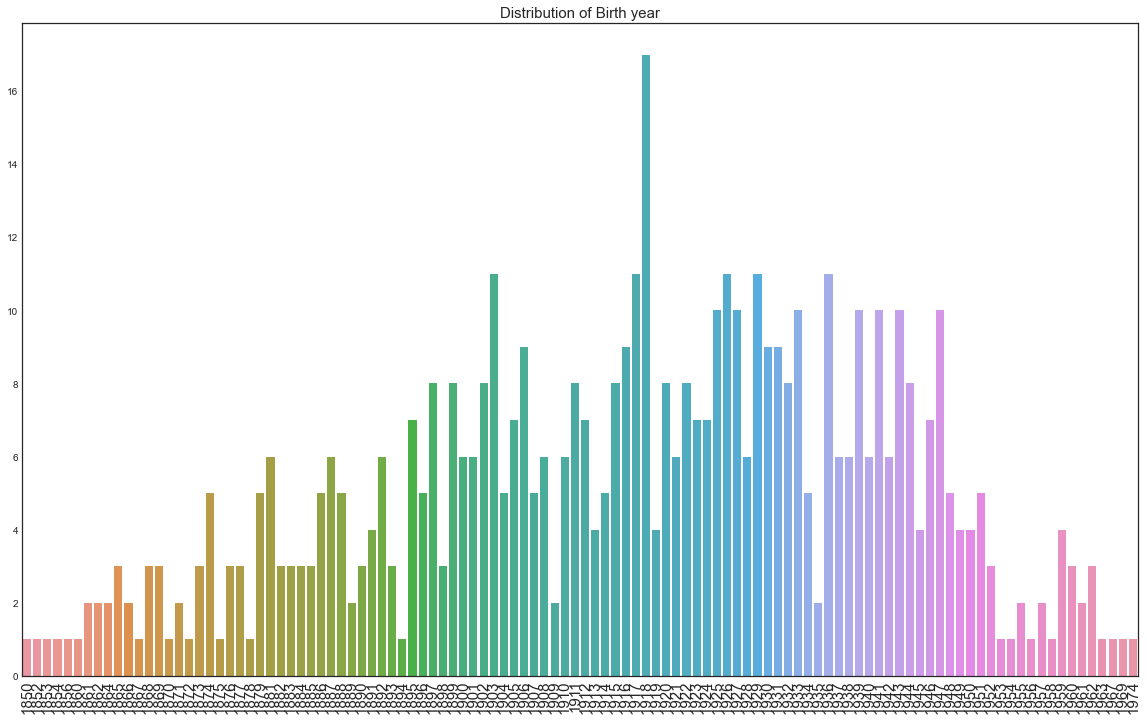

In [6]:
b_year = master.drop_duplicates('laureate_name').birthyear.value_counts()
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Distribution of Birth year', size = 15)
plt.xticks(rotation=90, size = 15)
sns.barplot(x=b_year.index, y = b_year.values)

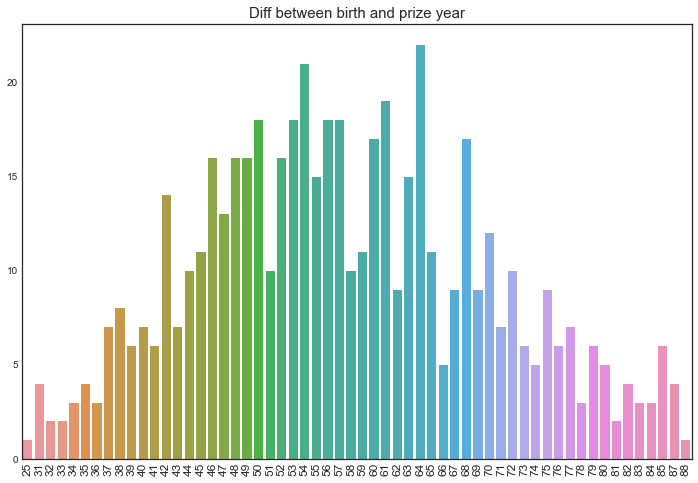

In [7]:
# diff between publication year and prize year 
master['birth_prize_diff'] = master.apply(lambda x: x['prize_year']- x['birthyear'], axis =1)

b_year = master.drop_duplicates('laureate_name').birth_prize_diff.value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Diff between birth and prize year', size = 15)
plt.xticks(rotation=90, size = 12)
sns.barplot(x=b_year.index, y = b_year.values)

In [7]:
''' Mange har en missing affiliation på et eller andet tidspunkt '''
master.drop_duplicates(['laureate_name', 'affiliation']).affiliation.value_counts(dropna=False)

NaN                                          498
harvard university                            43
stanford university                           30
university of cambridge                       29
california institute of technology            26
                                            ... 
kansai university                              1
fairchild semiconductor international inc      1
university of wurzburg                         1
institut francais                              1
university of bern                             1
Name: affiliation, Length: 454, dtype: int64

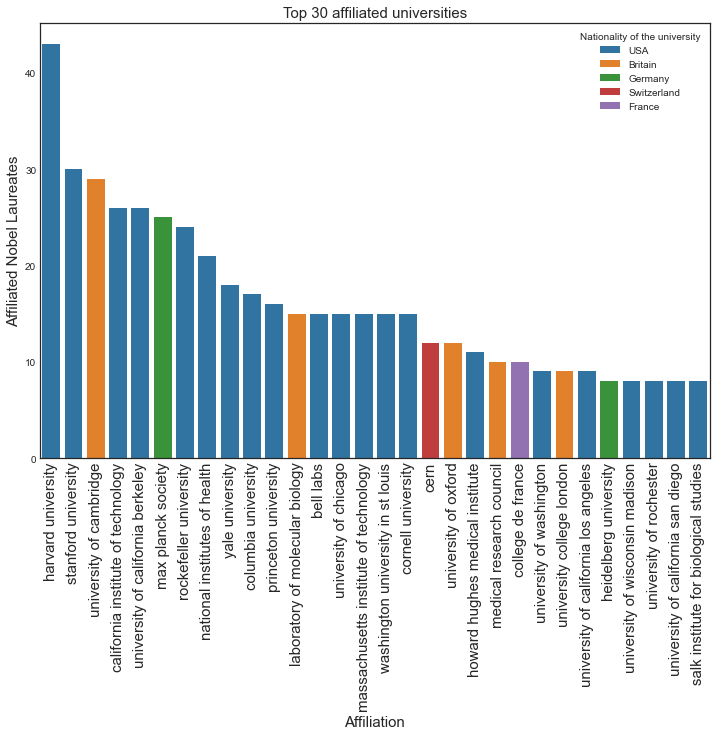

In [8]:
plt.style.use('seaborn-white')
afil_count = master.drop_duplicates(['laureate_name', 'affiliation']).affiliation.value_counts()

# Merge university data onto the value count
afil_freq = afil_count.reset_index(name='freq')\
                      .merge(uni_df, 
                             left_on ='index', 
                             right_on = 'affiliation').drop('index', axis =1)

sub = 30
sub_set = afil_freq.iloc[:sub, :].copy()

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data = sub_set, 
            x="affiliation",
            y = "freq",
            hue = 'uni_nationality',
            orient = 'v',
            dodge = False)

ax.set_title(f'Top {sub} affiliated universities', size = 15)
ax.set_xlabel('Affiliation', size = 15)
ax.set_ylabel('Affiliated Nobel Laureates', size = 15)
plt.xticks(rotation=90, size = 15)
plt.legend(title = 'Nationality of the university')

plt.show()

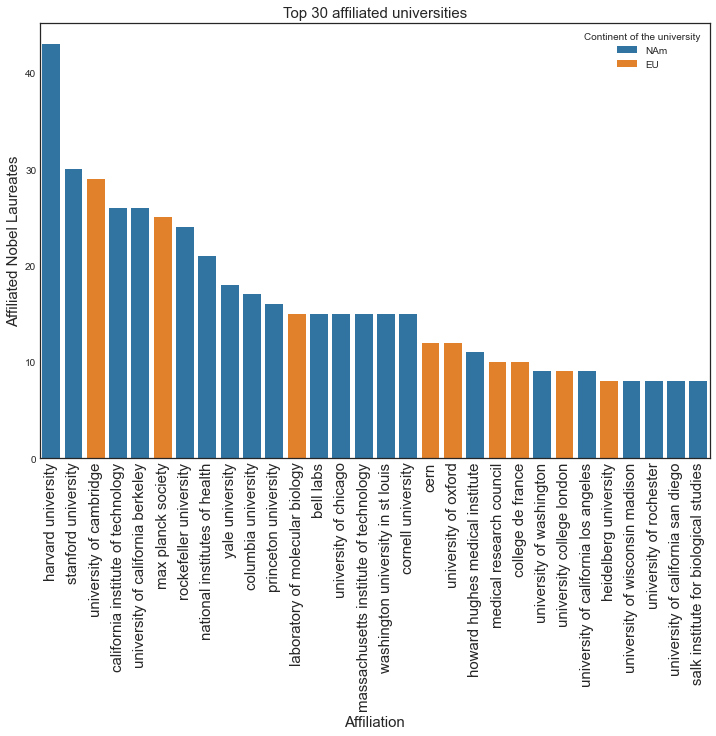

In [9]:
sub = 30
sub_set = afil_freq.iloc[:sub, :].copy()

fig, ax = plt.subplots(figsize=(12, 8))

sns.barplot(data = sub_set, 
            x="affiliation",
            y = "freq",
            hue = 'continent',
            orient = 'v',
            dodge = False)

ax.set_title(f'Top {sub} affiliated universities', size = 15)
ax.set_xlabel('Affiliation', size = 15)
ax.set_ylabel('Affiliated Nobel Laureates', size = 15)
plt.xticks(rotation=90, size = 15)
plt.legend(title = 'Continent of the university')

plt.show()

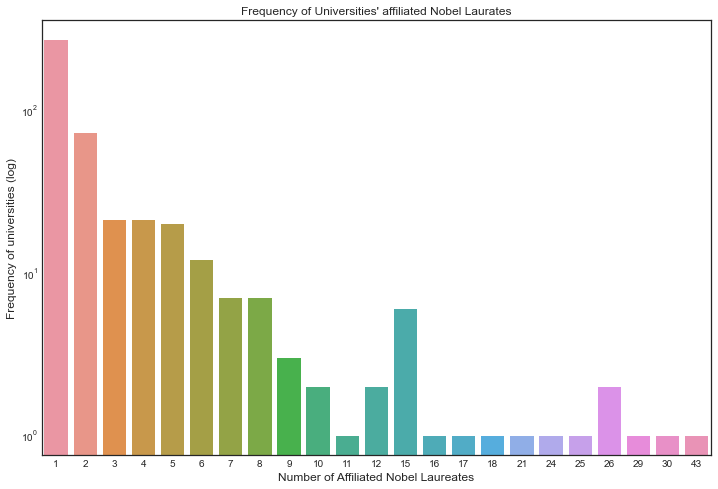

In [20]:
freq_count = afil_count.value_counts()
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Frequency of Universities' affiliated Nobel Laurates")
ax.set_xlabel('Number of Affiliated Nobel Laureates', size = 12)
ax.set_ylabel('Frequency of universities (log)', size = 12)
sns.barplot(x=freq_count.index, y = freq_count.values, ax=ax)
ax.set_yscale('log')

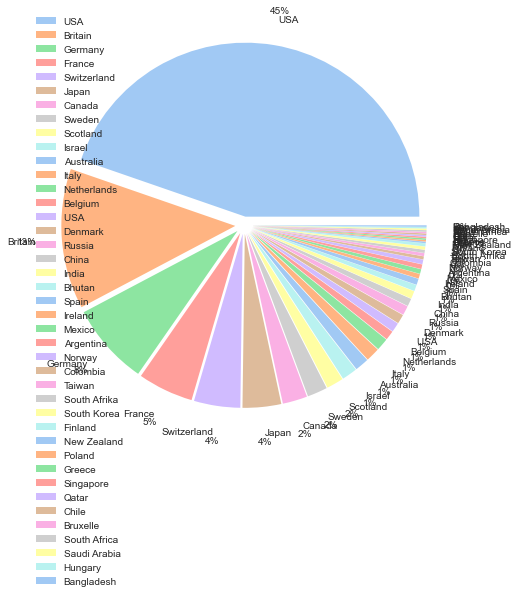

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


cont_cnt = master.drop_duplicates(['laureate_name', 'uni_nationality']).uni_nationality.value_counts()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(cont_cnt.index)]
fig, ax = plt.subplots(figsize = (8,8))

explode = [0.05 for x in range(len(cont_cnt.index))]
#create pie chart
plt.pie(x = cont_cnt.values, labels = cont_cnt.index, colors = colors, autopct='%.0f%%',
        explode = explode, pctdistance = 1.2, labeldistance = 1.15)
plt.legend()

plt.show()

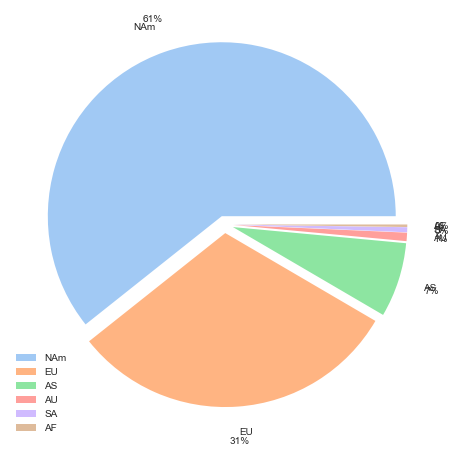

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


cont_cnt = master.drop_duplicates(['laureate_name', 'affiliation']).continent.value_counts()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize = (8,8))

explode = [0.05 for x in range(len(cont_cnt.index))]
#create pie chart
plt.pie(x = cont_cnt.values, labels = cont_cnt.index, colors = colors, autopct='%.0f%%',
        explode = explode, pctdistance = 1.2, labeldistance = 1.15)
plt.legend()

plt.show()

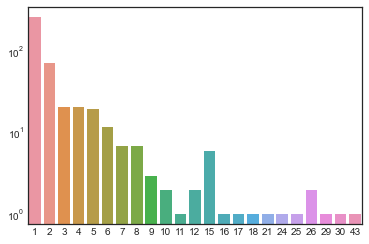

In [13]:
freq_count = afil_count.value_counts()
sns.barplot(x=freq_count.index, y = freq_count.values)
plt.yscale('log')

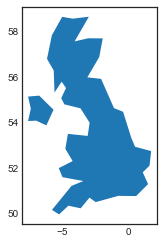

In [14]:
import geopandas as gpd
countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
countries.query('name == "United Kingdom"').plot()

# Individ Niveau

###  Gender

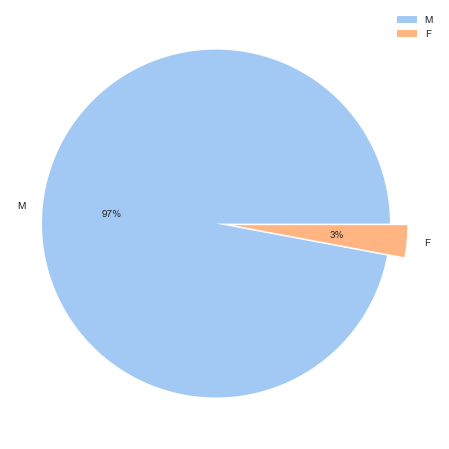

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_cnt = master.drop_duplicates(['laureate_name']).gender_mf.value_counts()
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(cont_cnt.index)]
fig, ax = plt.subplots(figsize = (8,8))

explode = [0.05 for x in range(len(cont_cnt.index))]
#create pie chart
plt.pie(x = cont_cnt.values, labels = cont_cnt.index, colors = colors, autopct='%.0f%%',
        explode = explode)
plt.legend()

plt.show()

# Organisations Niveau

# Gender